# Models of Data

We saw one model of data already -- the *Decision Tree* 

There are many more.  Here are a few more that are supported by scikit-learn:

>Support Vector Machines, kNN, Random Forests, Linear Regression


## Statistical Models vs Machine Learning

* Virtually no difference - more of a historical nomenclature given where the model came from (Statistics vs CS) than anything else

* Some of the older stats models make assumptions on the shape (distribution) of the data they work on

* To acknowledge that there is a confluence of Stats and Machine Learning we often talk about *Statistical Learning*

* Here we talk about machine learning implying both statistical and computational approaches


## Machine Learning

* Machine learning involves building models using computational approaches to help understand data. 

* Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

* These models exhibit features of learning because they let us draw  inferences from specific instances (data) to the general (prediction of unseen instances)


<!-- ![swan](assets/swans.jpg) -->
<img src="assets/swans.jpg" height="270" width="480">

The [Black Swan Problem](https://en.wikipedia.org/wiki/Falsifiability) is a classic example posed by the philosopher [Karl Popper](https://en.wikipedia.org/wiki/Karl_Popper) in the early twentieth century.  It roughly states that learning/induction is always a probabilistic argument since we can only learn from a limited number of observations (D) and make generalization from those on the universe at large (X).  On a more technical level it argues this point based on *falsifiability of an hypothesis*.

## Categories of Machine Learning: Supervised Learning

*Supervised learning* involves modeling the relationship between measured features of data and some label associated with the data,  e.g. play tennis

Once a model in this category is determined, it can be used to apply labels to new, unknown data. 

This is further subdivided into *classification* tasks and *regression* tasks: 

* classification, the labels are discrete categories, e.g. decision trees
* regression, the labels are continuous quantities, e.g. linear regression


## Categories of Machine Learning: Unsupervised Learning


*Unsupervised learning* involves modeling the features of a dataset without reference to any label, and is often described as “letting the dataset speak for itself.” 

These models include tasks such as *clustering* and *dimensionality reduction*: 

* clustering algorithms identify distinct groups of data, e.g. k-means
* dimensionality reduction algorithms search for more succinct representations of the data, e.g. PCA


![class](assets/classification1.jpg)

![class](assets/classification2.jpg)

# Simple Linear Classifier - The Perceptron

The [perceptron](https://en.wikipedia.org/wiki/Perceptron) is a single neuron neural network that constructs a linear decision surface.  The learned parameters are the weights (representing the slope) and the bias term representing the 'y-offset'.

## The Perceptron


<!-- ![perceptron](assets/perceptron.jpg) -->
<img src="assets/perceptron.jpg" height="450" width="600">

The perceptron implements the following equation:

<!-- ![perceptron](assets/perceptron-eq.jpg) -->
<img src="assets/perceptron-eq.jpg" height="80" width="600">

If you have taken linear algebra you will recognize the line/plane representation as a dot product.  The `sign` function implements the activation function of the neuron,
```
sign(x) = -1 if x <= 0 else 1
```
The symbol $\hat{f}$ denotes the neural network model.

Training a perceptron is a simple stochastic search:

<!-- ![perceptron](assets/perceptron-train.jpg) -->
<img src="assets/perceptron-train.jpg"  height="300" width="300">

This is a directed stochastic search. The `Update` function uses the *normal vector* of the decision surface w $\bullet$ x + b as a guide in order to modify w and b.

### Demo - The Perceptron

Perceptron learning a decision surface.



Let's build a perceptron using Sci-Kit Learn.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [37]:
# prepare our data - just grab the two variables from the Iris dataset that mattered
iris_df = pandas.read_csv("assets/iris.csv")
shrink_df = iris_df[['Petal.Width','Petal.Length','Species']]

# The perceptron can only deal with two labels at a time so drop one of them: virginica
model_df = shrink_df[shrink_df.Species != 'virginica']

# feature matrix and target vector
model_features_df = model_df[['Petal.Length','Petal.Width']]
# neural networks can only deal with numerical target values
model_target_df = model_df['Species'].apply(lambda x: 1 if x == 'setosa' else -1)

In [47]:
# build and fit the perceptron model
from sklearn.linear_model import Perceptron
model = LinearRegression()
model.fit(model_features_df, model_target_df)

# compute the model in terms that we can plot
slope = - model.coef_[0]/model.coef_[1]
offset = - model.intercept_/model.coef_[1]

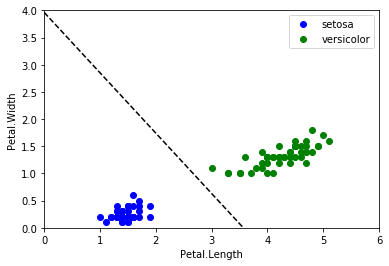

In [48]:
# scatter plot of the data
plt.plot(model_df['Petal.Length'][model_df.Species == 'setosa'],model_df['Petal.Width'][model_df.Species == 'setosa'],'bo')
plt.plot(model_df['Petal.Length'][model_df.Species == 'versicolor'],model_df['Petal.Width'][model_df.Species == 'versicolor'],'go')
plt.axis([0, 6, 0, 4])
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend(['setosa','versicolor'])

# plot the model
x_ticks = [0,6]
y_ticks = [slope * i + offset for i in x_ticks]
plt.plot(x_ticks,y_ticks,"k--")

# Linear Regression

In linear regression we try to fit a line through (x,y) data.  This line becomes an estimator that given an x value will estimate the corresponding y value.

Here is an example which given the speed of a car gives the breaking distance.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [4]:
cars_df = pandas.read_csv("assets/cars.csv")
cars_df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


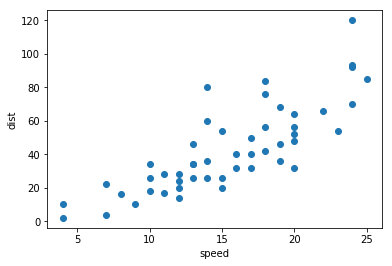

In [5]:
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')

We will model the relationship between speed and distance with a linear model.

In [6]:
# pick model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
# We have to reshape the values array to make 'fit' happy because
# the array only has a single feature
model.fit(cars_df['speed'].values.reshape(-1,1),cars_df['dist'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# look at the model parameters
print("slope: {}".format(model.coef_[0]))
print("intercept: {}".format(model.intercept_))

slope: 3.9324087591240873
intercept: -17.57909489051095


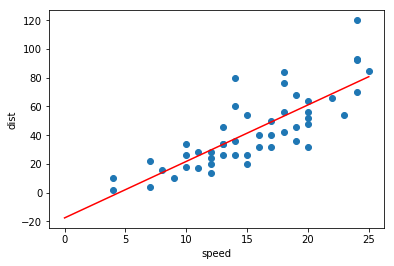

In [8]:
# plot the model ontop of the data
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')

x_ticks = [0,25]
y_ticks = [model.coef_[0] * i + model.intercept_ for i in x_ticks]
plt.plot(x_ticks,y_ticks,"r-")


# Regression Model Evaluation

Regression models do not have a notion of **classification accuracy** as we saw with trees but they have an [$R^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination) - the closer to 1.0 the score the better the model. 


In [9]:
# compute the R^2 score 
print("R^2 score: {}".format(model.score(cars_df['speed'].values.reshape(-1,1),cars_df['dist'])))


R^2 score: 0.6510793807582509


Not that great.  The low score is mainly due to the fact of the large errors (also called residuals) at the higher end of the speed spectrum.  The problem is that the data probably does not follow a linear relationship between speed and braking distance.  Let's try a different (non-linear) regression model to see if it can pick up this non-linear relationship.

## Non-Linear Regression: Regression Trees

R^2 score: 0.7921021699717283


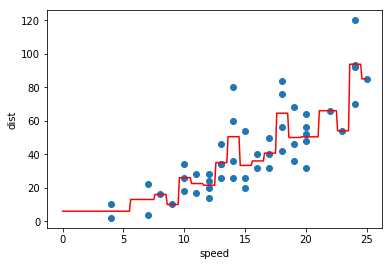

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas

# get our dataset
cars_df = pandas.read_csv("assets/cars.csv")

# pick model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=None)
# We have to reshape the values array to make 'fit' happy because
# the array only has a single feature
model.fit(cars_df['speed'].values.reshape(-1,1),cars_df['dist'])

# plot the model ontop of the data
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')

x_ticks = np.arange(0,25.0,0.1)
y_ticks = model.predict(x_ticks.reshape(-1, 1))
plt.plot(x_ticks,y_ticks,"r-")

# compute the R^2 score 
print("R^2 score: {}".format(model.score(cars_df['speed'].values.reshape(-1,1),cars_df['dist'])))


# Scikit-Learn Models

Scikit-Learn has a "standardized" view of how to build models and evaluate them:

1. Prepare your data (using Pandas)
  * `pd.read_csv`
  * `df.drop`
  * `df.head`
1. Pick your model and instantiate the model object:
  * decision trees: `tree.DecisionTreeClassifier(criterion='entropy')`
  * linear models: `LinearRegression(fit_intercept=True)`
1. Fit your model: the `fit` function.
1. Evaluate your model:
  * decision trees: `accuracy_score`
  * linear models ($R^2$-score): `score`

# Models

In machine learning we focus on *model performance* rather than looking at the internal model parameters.

For example, from a machine learning perspective in linear models the most important part is the $R^2$ score, the internal model coefficients are really coincidental and are only used to visualize the model.

We see this approach throughout all of the models we will be looking at.  Furthermore, some machine learning models simply do not have useful model parameters to look at, *e.g.*, neural networks.

# Midterm 

The midterm is a data analysis project very similar to the projects you have done over the last few weeks.  Find a data set whose **features/independent variables** are all **numerical** and whose **target/dependent variable** is categorical (**only labels - no numbers**, maximum number of different kind of labels is five).  If you have doubts about your selected dataset contact me.  The data set has to be different from all the data sets you have studied so far and you cannot select a dataset that appears in the asset folder of the course notes.  

You have to perform the following tasks on your selected data set:

* preliminary data analysis (use describe and count to analyze basic statistics on your data set).  Briefly report your findings.
* use visualization (especially scatter plots, histograms, and bar graphs) to explore your data set further. Report you findings.
* Build decision tree models. Build the **best** possible decision tree model of your data using the techniques such as grid-search and cross-validation covered in class. 
* Print your best model using treeviz and compute its accuracy
* Compute the confusion matrix and comment on type I and type II errors your model is committing and if you should be concerned about these errors.
* Provide a brief interpretation of the model.  Does it provide any deeper insights or patterns?  Can you relate the  model to patterns you found in your data during visualization?

The midterm is an **INDIVIDUAL** effort, that means each student has to select their own data set and write their own report.  No team work permitted.  Please submit both your notebook and your data set (perhaps as a zip file).